# Kaggle EEG Classification with Time Series MORF

In [2]:
import numpy as np
import pandas as pd
from glob import glob
import os
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score
from rerf import rerfClassifier

In [3]:
def prepare_data_train(fname):
    """ read and prepare training data """
    # Read data
    data = pd.read_csv(fname)
    # events file
    events_fname = fname.replace('_data','_events')
    # read event file
    labels= pd.read_csv(events_fname)
    clean=data.drop(['id' ], axis=1)#remove id
    labels=labels.drop(['id' ], axis=1)#remove id
    return  clean,labels

def prepare_data_test(fname):
    """ read and prepare test data """
    # Read data
    data = pd.read_csv(fname)
    return data

def data_preprocess_train(X):
    scaler= StandardScaler()
    X_prep=scaler.fit_transform(X)
    return X_prep

def moving_window(a, window, step_size=1):
    n,m = a.shape
    shape = (n - window + 1, window, m)
    strides = a.strides + (a.strides[-1] * step_size,)
    np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides).reshape(n-window+1, -1)

In [4]:
# Paths
data_dir = Path('/mnt/ssd3/ronan/grasp-and-lift-eeg-detection/')
train_dir = data_dir / 'train'
test_dir = data_dir / 'test'

# Columns name for labels
cols = ['HandStart','FirstDigitTouch',
        'BothStartLoadPhase','LiftOff',
        'Replace','BothReleased']

# Number of subjects
subjects = range(1,13)
ids_tot = []
pred_tot = []

## Training

In [5]:
# Parameters
window_width = 100
n_channels = 32

In [13]:
for i,subject in enumerate(subjects):
    y_raw= []
    raw = []
    ################ READ DATA ################################################
    fnames =  glob(str(train_dir / f'subj{subject}_series*_data.csv'))
    for fname in fnames:
        data,labels=prepare_data_train(fname)
        raw.append(data)
        y_raw.append(labels)

    X_train = np.asarray(pd.concat(raw).astype(float))
    y_train = np.asarray(pd.concat(y_raw).astype(float))
    #transform in numpy array
    #transform train data in numpy array
    #moving_window(X_train, window_width)
    y_train = np.asarray(y_train)
    y_dict = {i: y_train[:,i] for i in range(y_train.shape[1])}
    
    if i > 1:
        break

## Testing

In [ ]:
for i,subject in enumerate(subjects):
    fnames =  glob(str(test_dir / f'subj{subject}_series*_data.csv'))
    test = []
    idx=[]
    for fname in fnames:
        data=prepare_data_test(fname)
        test.append(data)
        idx.append(np.array(data['id']))
    X_test= pd.concat(test)
    ids=np.concatenate(idx)
    ids_tot.append(ids)
    X_test=X_test.drop(['id' ], axis=1)#remove id
    #transform test data in numpy array
    X_test = np.asarray(X_test.astype(float))
    
    if i > 1:
        break

## Test Plots

In [16]:
sums = sum(y_dict.values())[:3000]

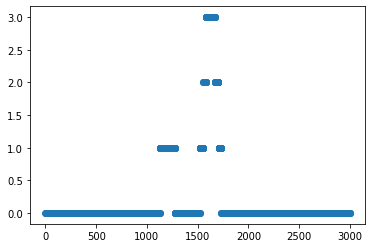

In [17]:
plt.scatter(np.arange(len(sums)), sums)
plt.show()